In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import numpy as np

In [9]:
df=pd.read_csv('global_electricity_production_data.csv')

In [10]:
df.head()

,country_name,date,parameter,product,value,unit
0,Australia,12/1/2023,Net Electricity Production,Electricity,22646.1901,GWh
1,Australia,12/1/2023,Net Electricity Production,Total Combustible Fuels,13397.9356,GWh
2,Australia,12/1/2023,Net Electricity Production,"Coal, Peat and Manufactured Gases",9768.5223,GWh
3,Australia,12/1/2023,Net Electricity Production,Oil and Petroleum Products,289.5415,GWh
4,Australia,12/1/2023,Net Electricity Production,Natural Gas,3091.9272,GWh


In [11]:
df.shape

(121074, 6)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121074 entries, 0 to 121073
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   country_name  121074 non-null  object 
 1   date          121074 non-null  object 
 2   parameter     121074 non-null  object 
 3   product       121074 non-null  object 
 4   value         121060 non-null  float64
 5   unit          121074 non-null  object 
dtypes: float64(1), object(5)
memory usage: 5.5+ MB


In [13]:
df.isnull().sum()

,0
country_name,0
date,0
parameter,0
product,0
value,14
unit,0


In [14]:
df=df.dropna()

In [15]:
df.isnull().sum()

,0
country_name,0
date,0
parameter,0
product,0
value,0
unit,0


In [16]:
df.duplicated().sum()

0

In [17]:
pd.Series(df['country_name'].unique())

,0
0,Australia
1,Austria
2,Belgium
3,Canada
4,Chile
5,Colombia
6,Costa Rica
7,Czech Republic
8,Denmark
9,Estonia


In [18]:
country_count=df['country_name'].value_counts().reset_index()
country_count

,country_name,count
0,France,3348
1,United Kingdom,3264
2,United States,3240
3,Germany,3230
4,Turkey,3205
5,Canada,3204
6,Portugal,3134
7,Spain,3120
8,Italy,3120
9,Belgium,3120


In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

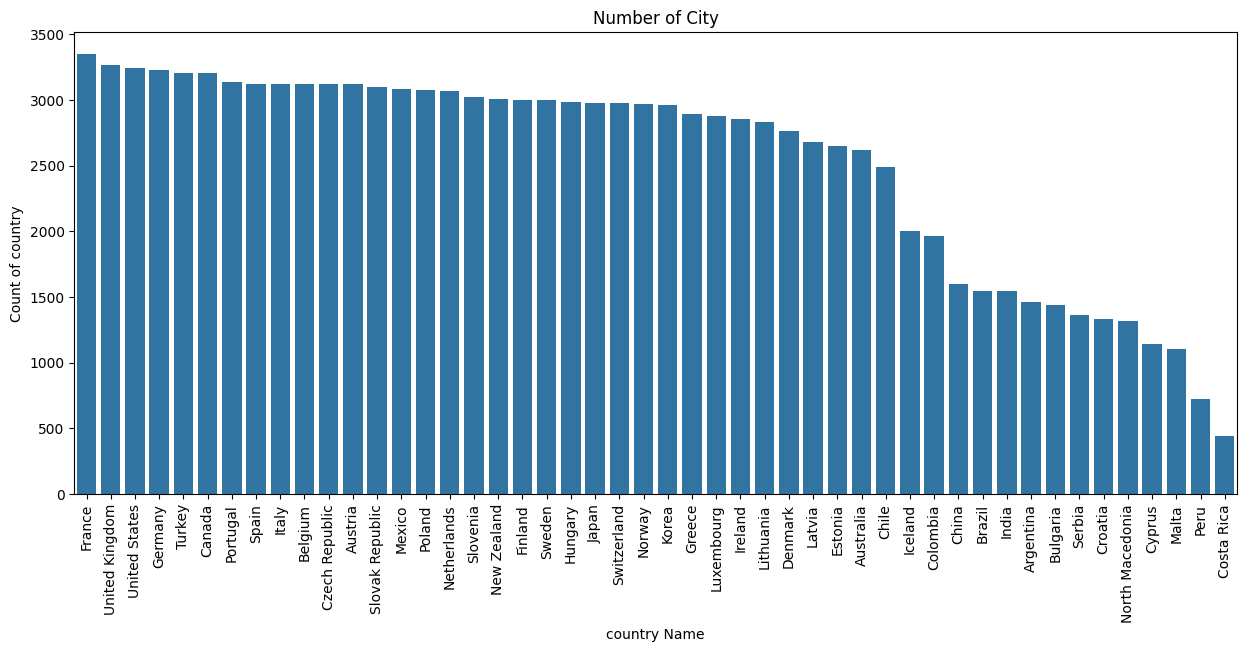

In [20]:
plt.figure(figsize=(15,6))
sns.barplot(data=country_count,x='country_name',y='count')
plt.title('Number of City')
plt.xlabel('country Name')
plt.ylabel('Count of country')
plt.xticks(rotation=90)
plt.show()

In [21]:
df['parameter'].value_counts()

,count
parameter,
Net Electricity Production,93318
Final Consumption (Calculated),6036
Distribution Losses,6033
Total Exports,5416
Total Imports,5411
Used for pumped storage,4846


In [22]:
grouped_data = df.groupby('parameter')['value'].sum().reset_index()

In [23]:
grouped_data

,parameter,value
0,Distribution Losses,9.105886e+06
1,Final Consumption (Calculated),1.375341e+08
2,Net Electricity Production,6.769583e+08
3,Total Exports,6.699914e+06
4,Total Imports,6.818840e+06
5,Used for pumped storage,1.233267e+06


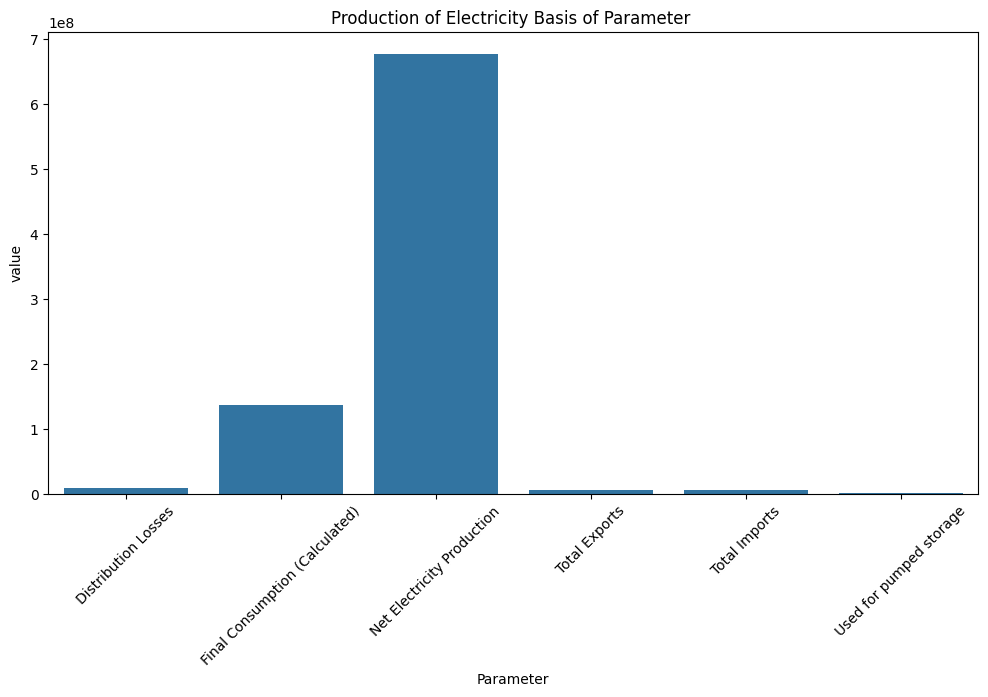

In [24]:
plt.figure(figsize=(12,6))
sns.barplot(y=grouped_data['value'],x=grouped_data['parameter'])
plt.title('Production of Electricity Basis of Parameter ')
plt.xlabel('Parameter')
plt.xticks(rotation=45)
plt.show()

In [25]:
country_consumption=df.groupby('country_name')['value'].sum().reset_index().sort_values(by='value', ascending=True)

In [26]:
country_consumption

,country_name,value
30,Malta,4.868088e+04
12,Cyprus,1.299828e+05
10,Costa Rica,1.462696e+05
34,North Macedonia,1.465130e+05
29,Luxembourg,3.518601e+05
11,Croatia,3.635550e+05
27,Latvia,4.579402e+05
28,Lithuania,5.443972e+05
15,Estonia,6.507219e+05
39,Serbia,9.517317e+05


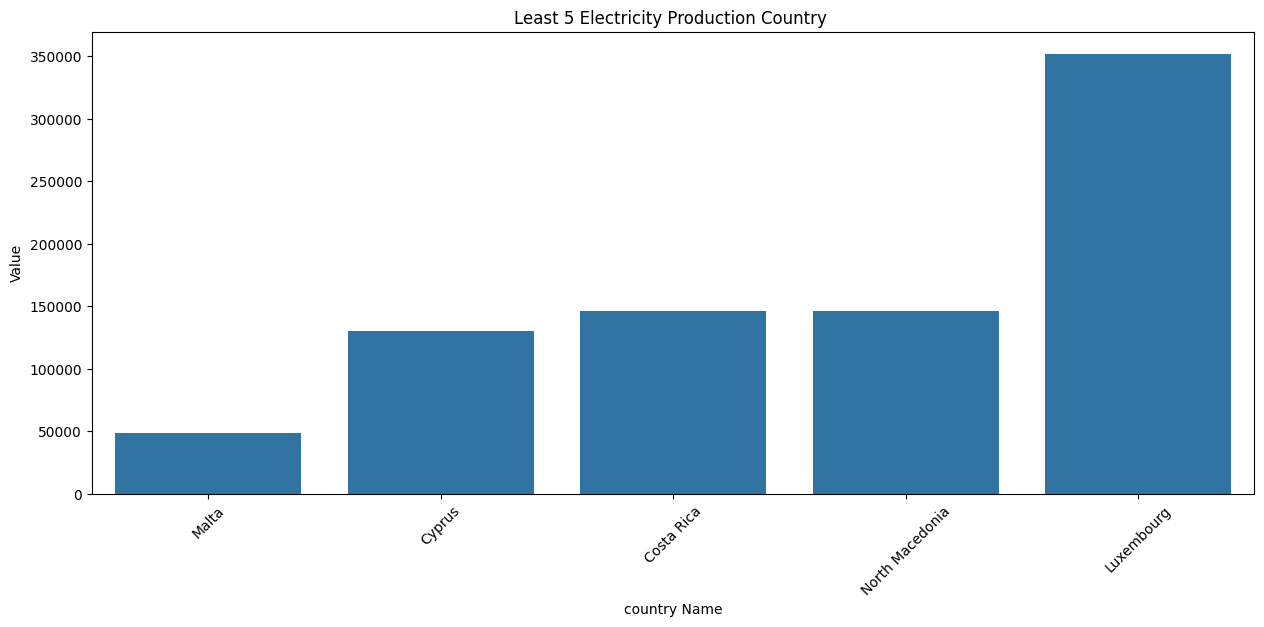

In [27]:
plt.figure(figsize=(15,6))
sns.barplot(data=country_consumption.head(5),x='country_name',y='value')
plt.title('Least 5 Electricity Production Country ')
plt.xlabel('country Name')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.show()

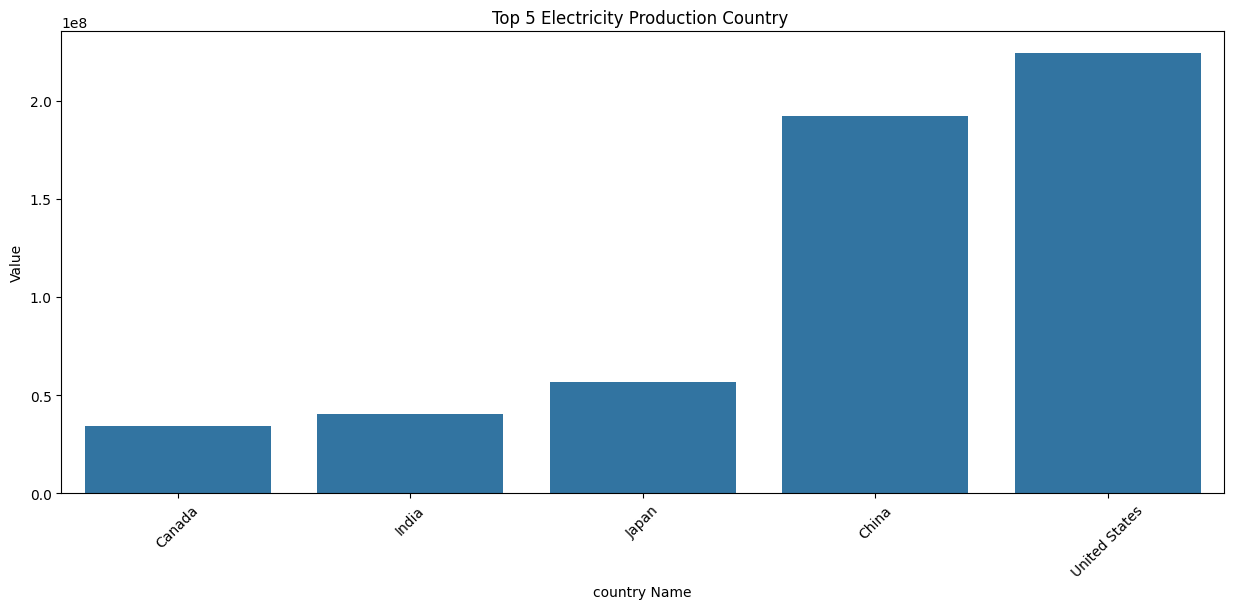

In [28]:
plt.figure(figsize=(15,6))
sns.barplot(data=country_consumption.tail(5),x='country_name',y='value')
plt.title('Top 5 Electricity Production Country ')
plt.xlabel('country Name')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.show()


In [29]:
df.sample(5)

,country_name,date,parameter,product,value,unit
9022,Poland,12/1/2022,Net Electricity Production,Solar,194.3803,GWh
105701,United States,3/1/2012,Net Electricity Production,Total Combustible Fuels,205173.4120,GWh
71314,Korea,8/1/2016,Net Electricity Production,Other Renewables,41.3330,GWh
30503,Malta,10/1/2020,Net Electricity Production,Other Combustible Non-Renewables,0.0000,GWh
60114,Sweden,12/1/2017,Net Electricity Production,Solar,0.9889,GWh


In [30]:
df['product'].unique()

array(['Electricity', 'Total Combustible Fuels',
       'Coal, Peat and Manufactured Gases', 'Oil and Petroleum Products',
       'Natural Gas', 'Combustible Renewables', 'Hydro', 'Wind', 'Solar',
       'Total Renewables (Hydro, Geo, Solar, Wind, Other)',
       'Other Combustible Non-Renewables', 'Geothermal', 'Not Specified',
       'Nuclear', 'Other Renewables'], dtype=object)

In [31]:
product=df['product'].value_counts().reset_index()
product

,product,count
0,Electricity,34930
1,Total Combustible Fuels,7188
2,"Total Renewables (Hydro, Geo, Solar, Wind, Other)",7188
3,Hydro,7070
4,Oil and Petroleum Products,7066
5,Combustible Renewables,7049
6,Wind,7040
7,Natural Gas,6923
8,Solar,6898
9,"Coal, Peat and Manufactured Gases",6525


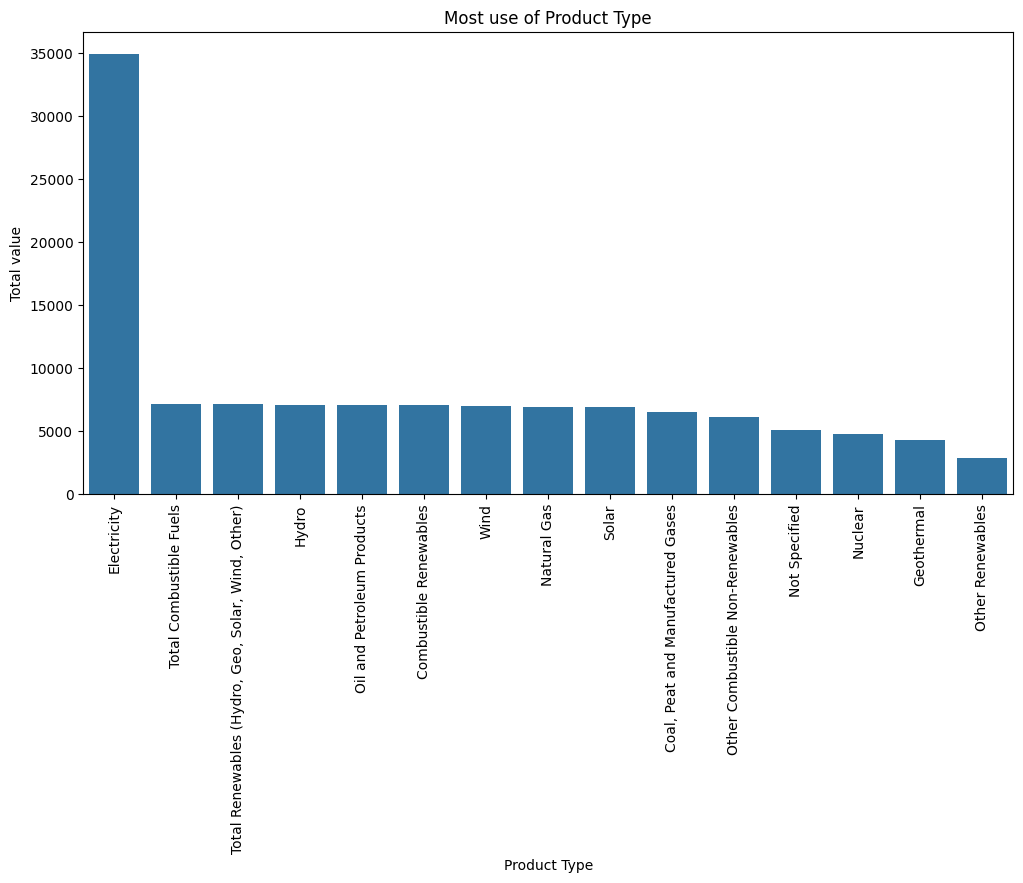

In [32]:
plt.figure(figsize=(12,6))
sns.barplot(data=product,x='product',y='count')
plt.title('Most use of Product Type')
plt.xlabel('Product Type')
plt.ylabel('Total value')
plt.xticks(rotation=90)
plt.show()

In [33]:
df['Year']=pd.DatetimeIndex(df['date']).year

In [34]:
df.sample(2)

,country_name,date,parameter,product,value,unit,Year
116760,Poland,8/1/2010,Net Electricity Production,Combustible Renewables,486.8240,GWh,2010
68475,Latvia,12/1/2016,Net Electricity Production,Electricity,688.9308,GWh,2016


In [35]:
df['Year'].unique()

array([2023, 2022, 2021, 2020, 2019, 2018, 2017, 2016, 2015, 2014, 2013,
       2012, 2011, 2010], dtype=int32)

In [36]:
total_prodution_year=df.groupby('Year')['value'].sum().reset_index()
total_prodution_year

,Year,value
0,2010,4.049677e+07
1,2011,4.059139e+07
2,2012,4.082690e+07
3,2013,4.083009e+07
4,2014,4.110371e+07
5,2015,6.395248e+07
6,2016,6.552948e+07
7,2017,6.731624e+07
8,2018,6.986131e+07
9,2019,7.053236e+07


<Figure size 500x500 with 0 Axes>

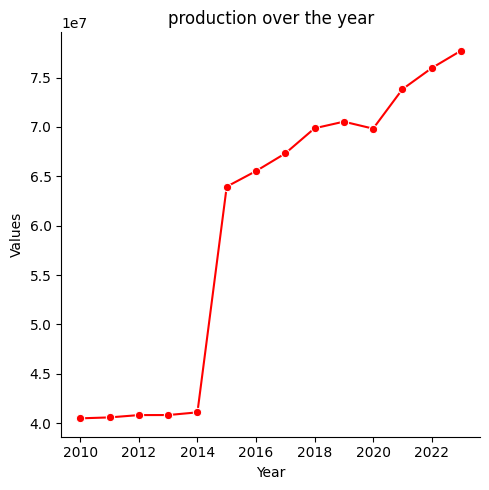

In [37]:
import warnings
warnings.filterwarnings("ignore")
plt.figure(figsize=(5,5))
sns.relplot(data=total_prodution_year,x='Year',y='value',kind='line',color='red',marker='o')
plt.title('production over the year')
plt.xlabel('Year')
plt.ylabel('Values')
plt.tight_layout()
plt.show()